对计算机而言，能够“看到”的是图像被编码之后的数字，但它很难理解高层语义概念，比如图像或者视频帧中出现的目标是人还是物体，更无法定位目标出现在图像中哪个区域。目标检测的主要目的是让计算机可以自动识别图片或者视频帧中所有目标的类别，并在该目标周围绘制边界框，标示出每个目标的位置，如 **图1** 所示。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/e25116d994724f83abe3bef7f033c1c89bf34e083075494bb7833947c557f4fc" width = "700"  div align=center" width = "800"></center>
<center><br>图1：图像分类和目标检测示意图</br></center>
<br></br>
  
* 图1（a）是图像分类任务，只需识别出这是一张斑马的图片。 
* 图1（b）是目标检测任务，不仅要识别出这是一张斑马的图片，还要标出图中斑马的位置。

# 目标检测发展历程

在上一节中我们学习了图像分类处理基本流程，先使用卷积神经网络提取图像特征，然后再用这些特征预测分类概率，根据训练样本标签建立起分类损失函数，开启端到端的训练，如 **图2** 所示。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/cf21664a4a1f4392945f86812d466879132426ab602846c38dab0eca0600e579" width = "800"></center>
<center><br>图2：图像分类流程示意图</br></center>
<br></br>

但对于目标检测问题，按照 **图2** 的流程则行不通。因为在图像分类任务中，对整张图提取特征的过程中没能体现出不同目标之间的区别，最终也就没法分别标示出每个物体所在的位置。

为了解决这个问题，结合图片分类任务取得的成功经验，我们可以将目标检测任务进行拆分。假设我们现在有某种方式可以在输入图片上生成一系列可能包含物体的区域，这些区域称为候选区域，在一张图上可以生成很多个候选区域。然后对每个候选区域，可以把它单独当成一幅图像来看待，使用图像分类模型对它进行分类，看它属于哪个类别或者背景（即不包含任何物体的类别）。

上一节我们学过如何解决图像分类任务，使用卷积神经网络对一幅图像进行分类不再是一件困难的事情。那么，现在问题的关键就是如何产生候选区域？比如我们可以使用穷举法来产生候选区域，如图3所示。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/57755ac8e95a460f9262afc7c37a0db51f66027ff86c40e2967a2e22524c20a1" width = "800"></center>
<center><br>图3：候选区域</br></center>
<br></br>

A为图像上的某个像素点，B为A右下方另外一个像素点，A、B两点可以确定一个矩形框，记作AB。

* 如图3（a）所示：A在图片左上角位置，B遍历除A之外的所有位置，生成矩形框A1B1, …, A1Bn, …
* 如图3（b）所示：A在图片中间某个位置，B遍历A右下方所有位置，生成矩形框AkB1, …, AkBn, …

当A遍历图像上所有像素点，B则遍历它右下方所有的像素点，最终生成的矩形框集合{AiBj}将会包含图像上所有可以选择的区域。

只要我们对每个候选区域的分类足够的准确，则一定能找到跟实际物体足够接近的区域来。穷举法也许能得到正确的预测结果，但其计算量也是非常巨大的，其所生成的总候选区域数目约为$\frac{W^2 H^2}{4}$，假设$H=W=100$，总数将会达到$2.5 \times 10^{7}$个，如此多的候选区域使得这种方法几乎没有什么实用性。但是通过这种方式，我们可以看出，假设分类任务完成的足够完美，从理论上来讲检测任务也是可以解决的，亟待解决的问题是如何设计出合适的方法来产生候选区域。

科学家们开始思考，是否可以应用传统图像算法先产生候选区域，然后再用卷积神经网络对这些区域进行分类？

* 2013年，[Ross Girshick](https://arxiv.org/abs/1311.2524) 等人于首次将CNN的方法应用在目标检测任务上，他们使用传统图像算法[Selective Search](https://link.springer.com/article/10.1007/s11263-013-0620-5)产生候选区域，取得了极大的成功，这就是对目标检测领域影响深远的区域卷积神经网络(R-CNN)模型。
* 2015年，[Ross Girshick](https://arxiv.org/abs/1504.08083) 对此方法进行了改进，提出了Fast R-CNN模型。通过将不同区域的物体共用卷积层的计算，大大缩减了计算量，提高了处理速度，而且还引入了调整目标物体位置的回归方法，进一步提高了位置预测的准确性。
* 2015年，[Shaoqing Ren](https://arxiv.org/abs/1506.01497) 等人提出了Faster R-CNN模型，提出了RPN的方法来产生物体的候选区域，这一方法不再需要使用传统的图像处理算法来产生候选区域，进一步提升了处理速度。
* 2017年，[Kaiming He](https://arxiv.org/abs/1703.06870) 等人提出了Mask R-CNN模型，只需要在Faster R-CNN模型上添加比较少的计算量，就可以同时实现目标检测和物体实例分割两个任务。

以上都是基于R-CNN系列的著名模型，对目标检测方向的发展有着较大的影响力。此外，还有一些其他模型，比如[SSD](https://arxiv.org/abs/1512.02325)、YOLO([1](https://arxiv.org/abs/1506.02640v5), [2](https://arxiv.org/abs/1612.08242), [3](https://arxiv.org/abs/1804.02767))、[R-FCN](https://arxiv.org/abs/1605.06409)等也都是目标检测领域流行的模型结构。

R-CNN的系列算法分成两个阶段，先在图像上产生候选区域，再对候选区域进行分类并预测目标物体位置，它们通常被叫做两阶段检测算法。SSD和YOLO算法则只使用一个网络同时产生候选区域并预测出物体的类别和位置，所以它们通常被叫做单阶段检测算法。由于篇幅所限，本章将重点介绍YOLOv3算法，并用其完成林业病虫害检测任务，主要涵盖如下内容：

* 图像检测基础概念：介绍与目标检测相关的基本概念，包括边界框、锚框和交并比等。
* 林业病虫害数据集：介绍数据集结构及数据预处理方法。
* YOLOv3目标检测模型：介绍算法原理，及如何应用林业病虫害数据集进行模型训练和测试。


## 目标检测基础概念

在介绍目标检测算法之前，先介绍一些跟检测相关的基本概念，包括边界框、锚框和交并比等。

### 边界框（bounding box）

检测任务需要同时预测物体的类别和位置，因此需要引入一些跟位置相关的概念。通常使用边界框（bounding box，bbox）来表示物体的位置，边界框是正好能包含物体的矩形框，如 **图4** 所示，图中3个人分别对应3个边界框。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/f581e1bfd07a414596368c9c03a1b30ea115a2e30a014be68b2c26961f5c38fa" width = "400"  div align=center"></center>
<center><br>图4：边界框</br></center>
<br></br>

通常有两种格式来表示边界框的位置：

1. $xyxy$，即$(x_1, y_1, x_2, y_2)$，其中$(x_1, y_1)$是矩形框左上角的坐标，$(x_2, y_2)$是矩形框右下角的坐标。图4中3个红色矩形框用$xyxy$格式表示如下：
  
* 左：$(40.93, 141.1, 226.99, 515.73)$。
* 中：$(214.29, 325.03, 399.82, 631.37)$。
* 右：$(247.2, 131.62, 480.0, 639.32)$。
  
2. $xywh$，即$(x, y, w, h)$，其中$(x, y)$是矩形框中心点的坐标，$w$是矩形框的宽度，$h$是矩形框的高度。

在检测任务中，训练数据集的标签里会给出目标物体真实边界框所对应的$(x_1, y_1, x_2, y_2)$，这样的边界框也被称为真实框（ground truth box），如 **图4** 所示，图中画出了3个人像所对应的真实框。模型会对目标物体可能出现的位置进行预测，由模型预测出的边界框则称为预测框（prediction box）。
  
------

**注意：**

1. 在阅读代码时，请注意使用的是哪一种格式的表示方式。
1. 图片坐标的原点在左上角，$x$轴向右为正方向，$y$轴向下为正方向。

------

要完成一项检测任务，我们通常希望模型能够根据输入的图片，输出一些预测的边界框，以及边界框中所包含的物体的类别或者说属于某个类别的概率，例如这种格式: $[L, P, x_1, y_1, x_2, y_2]$，其中$L$是类别标签，$P$是物体属于该类别的概率。一张输入图片可能会产生多个预测框，接下来让我们一起学习如何完成这项任务。

### 锚框（Anchor box）

锚框与物体边界框不同，是由人们假想出来的一种框。先设定好锚框的大小和形状，再以图像上某一个点为中心画出矩形框。在下图中，以像素点[300, 500]为中心可以使用下面的程序生成3个框，如图中蓝色框所示，其中锚框A1跟人像区域非常接近。

300.0 500.0 282.84271247461896 141.4213562373095
300.0 500.0 200.0 200.0
300.0 500.0 141.42135623730948 282.842712474619


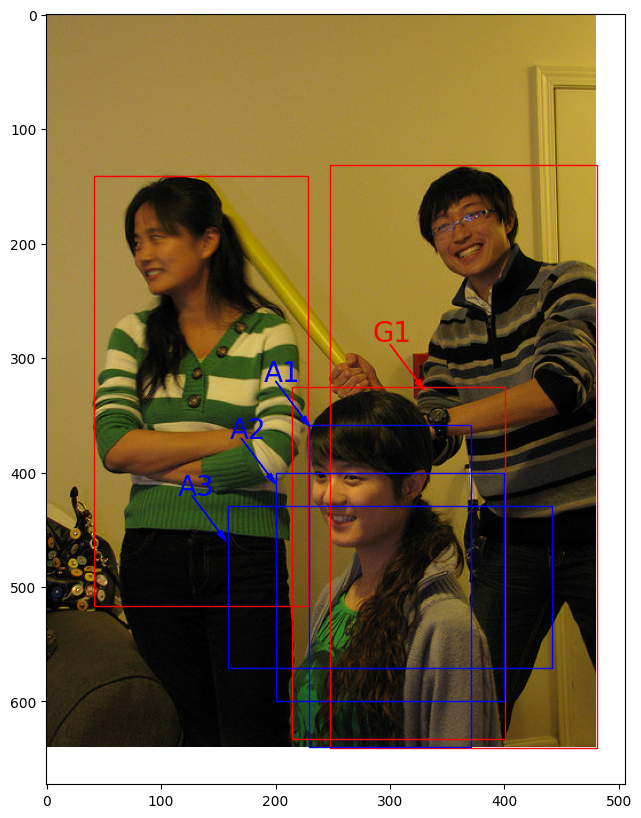

In [1]:
# 画图展示如何绘制边界框和锚框
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.image import imread
import math

# 定义画矩形框的程序    
def draw_rectangle(currentAxis, bbox, edgecolor = 'k', facecolor = 'y', fill=False, linestyle='-'):
    # currentAxis，坐标轴，通过plt.gca()获取
    # bbox，边界框，包含四个数值的list， [x1, y1, x2, y2]
    # edgecolor，边框线条颜色
    # facecolor，填充颜色
    # fill, 是否填充
    # linestype，边框线型
    # patches.Rectangle需要传入左上角坐标、矩形区域的宽度、高度等参数
    rect=patches.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0]+1, bbox[3]-bbox[1]+1, linewidth=1,
                           edgecolor=edgecolor,facecolor=facecolor,fill=fill, linestyle=linestyle)
    currentAxis.add_patch(rect)

    
plt.figure(figsize=(10, 10))

filename = './work/section3/000000086956.jpg'
im = imread(filename)
plt.imshow(im)

# 使用xyxy格式表示物体真实框
bbox1 = [214.29, 325.03, 399.82, 631.37]
bbox2 = [40.93, 141.1, 226.99, 515.73]
bbox3 = [247.2, 131.62, 480.0, 639.32]

currentAxis=plt.gca()

draw_rectangle(currentAxis, bbox1, edgecolor='r')
draw_rectangle(currentAxis, bbox2, edgecolor='r')
draw_rectangle(currentAxis, bbox3,edgecolor='r')

# 绘制锚框
def draw_anchor_box(center, length, scales, ratios, img_height, img_width):
    """
    以center为中心，产生一系列锚框
    其中length指定了一个基准的长度
    scales是包含多种尺寸比例的list
    ratios是包含多种长宽比的list
    img_height和img_width是图片的尺寸，生成的锚框范围不能超出图片尺寸之外
    """
    bboxes = []
    for scale in scales:
        for ratio in ratios:
            h = length*scale*math.sqrt(ratio)
            w = length*scale/math.sqrt(ratio) 
            x1 = max(center[0] - w/2., 0.)
            y1 = max(center[1] - h/2., 0.)
            x2 = min(center[0] + w/2. - 1.0, img_width - 1.0)
            y2 = min(center[1] + h/2. - 1.0, img_height - 1.0)
            print(center[0], center[1], w, h)
            bboxes.append([x1, y1, x2, y2])

    for bbox in bboxes:
        draw_rectangle(currentAxis, bbox, edgecolor = 'b')

img_height = im.shape[0]
img_width = im.shape[1]        
draw_anchor_box([300., 500.], 100., [2.0], [0.5, 1.0, 2.0], img_height, img_width)


################# 以下为添加文字说明和箭头###############################

plt.text(285, 285, 'G1', color='red', fontsize=20)
plt.arrow(300, 288, 30, 40, color='red', width=0.001, length_includes_head=True, \
         head_width=5, head_length=10, shape='full')

plt.text(190, 320, 'A1', color='blue', fontsize=20)
plt.arrow(200, 320, 30, 40, color='blue', width=0.001, length_includes_head=True, \
         head_width=5, head_length=10, shape='full')

plt.text(160, 370, 'A2', color='blue', fontsize=20)
plt.arrow(170, 370, 30, 40, color='blue', width=0.001, length_includes_head=True, \
         head_width=5, head_length=10, shape='full')

plt.text(115, 420, 'A3', color='blue', fontsize=20)
plt.arrow(127, 420, 30, 40, color='blue', width=0.001, length_includes_head=True, \
         head_width=5, head_length=10, shape='full')

#draw_anchor_box([200., 200.], 100., [2.0], [0.5, 1.0, 2.0])    
plt.show()

在目标检测任务中，通常会以某种规则在图片上生成一系列锚框，将这些锚框当成可能的候选区域。模型对这些候选区域是否包含物体进行预测，如果包含目标物体，则还需要进一步预测出物体所属的类别。还有更为重要的一点是，由于锚框位置是固定的，它不大可能刚好跟物体边界框重合，所以需要在锚框的基础上进行微调以形成能准确描述物体位置的预测框，模型需要预测出微调的幅度。在训练过程中，模型通过学习不断的调整参数，最终能学会如何判别出锚框所代表的候选区域是否包含物体，如果包含物体的话，物体属于哪个类别，以及物体边界框相对于锚框位置需要调整的幅度。

不同的模型往往有着不同的生成锚框的方式，在后面的内容中，会详细介绍YOLOv3算法里面产生锚框的规则，理解了它的设计方案，也很容易类推到其它模型上。